### *О работе*

---

**Назване**: Лабораторная работа № 1. Предварительная обработка данных  
**Автор**: Шашаев Кирилл  
**Проверил**: Новиков И. А.  
**Номер варианта**: 4  
**Тема датасета**: Дожди в Индии  
**Источник**: [kaggle](https://www.kaggle.com/datasets/rajanand/rainfall-in-india)  
**Цель работы**: получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.

### *Общее задания*

---

1.	Результат выполнения следующих функций библиотеки Pandas: head, tail, info, describe, shape. Показать результат их применения к данным.
2.	Пустые значения.  
  a.	Вывести количество пустых значений по колонкам. (отсортировать по убыванию)  
  b.	Вывести процент пустых значений по колонкам. (отсортировать по убыванию)  
  c.	Показать выводы функции info до и после очистки.  
3.	Удаление дубликатов. (drop_duplicates) Вывести количество строк до удаления и после. Так же вывести количество найденных дубликатов.


### *Задания для варианта*

---

1. Постройте графики количества осадков по годам в разных штатах. Сделайте выводы по построенным графикам.
2. Постройте графики количества осадков по месяцам по всем годам кумулятивно. Сделайте выводы по построенным графикам.
3. Постройте графики количества осадков по штатам, используйте boxplot. Сделайте выводы по построенным графикам.
4. Определите штаты, для которых количество осадков минимально и максимально.
5. Выведите уникальные имена штатов и территорий Индии.
6. Определите количество лет наблюдений для каждого штата.
7. Определите штат с наименьшим количеством наблюдений
8. Добавьте в набор данных признак, являющийся суммой двух других признаков.
9. Вычислите корреляцию Пирсона и Спирмена между признаками NOV и MAR. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


### *Данное описание датасета*

---

- *Описание на русском*:  
  **Период времени**: 1901-2015  
  **Детализация**: по месяцам  
  **Местоположение**: 36 метеорологических подразделений Индии  
  **Количество осадков**: мм  
- *Описание на английском (оригинал)*:  
  **Time Period**: 1901 - 2015  
  **Granularity**: Monthly  
  **Location**: 36 meteorological sub-divisions in India  
  **Rainfall unit**: mm  

### *Импорт нужных бибилеотек*

---


In [276]:
import numpy as np
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sklearn.preprocessing
import sklearn.model_selection

### *Подключение к файлу*

---

Устанавливаем датасет

In [52]:
url = 'https://drive.google.com/uc?id=1KSFUgjOUf08G__hj-lUzws6C7VDlZR2n'
output = 'district_wise_rainfall.csv'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1KSFUgjOUf08G__hj-lUzws6C7VDlZR2n
To: /content/district_wise_rainfall.csv
100%|██████████| 528k/528k [00:00<00:00, 60.6MB/s]


'district_wise_rainfall.csv'

Проверяем что нужный файл скачался

In [53]:
!ls

 district_wise_rainfall.csv  'district wise rainfall normal.csv'   drive   sample_data


Открываем *датасет*

In [88]:
df = pd.read_csv(output, encoding='utf-8')

### *Анализ датасета*

---

Смотрим первые 10-ть записей

In [89]:
df.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


Последние 10 - ть записей

In [93]:
df.tail(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4106,LAKSHADWEEP,2006,20.1,0.0,33.0,0.3,327.9,286.9,172.3,150.7,318.5,119.1,158.9,10.9,1598.6,20.1,361.2,928.4,288.9
4107,LAKSHADWEEP,2007,2.5,4.2,0.2,22.2,166.2,573.4,427.4,294.7,457.5,256.1,47.6,109.6,2361.6,6.7,188.6,1753.0,413.3
4108,LAKSHADWEEP,2008,5.5,19.8,120.7,15.8,180.4,254.6,363.9,206.6,108.9,252.9,67.6,130.1,1726.8,25.3,316.9,934.0,450.6
4109,LAKSHADWEEP,2009,4.7,1.5,0.1,18.1,162.1,401.2,266.4,185.0,145.1,87.4,166.2,132.3,1570.1,6.2,180.3,997.7,385.9
4110,LAKSHADWEEP,2010,18.8,0.0,1.2,35.6,79.0,318.9,336.7,335.1,161.5,155.4,201.5,81.5,1725.2,18.8,115.8,1152.2,438.4
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


Кол-во записей

In [59]:
len(df)

4116

Информация о *числовых колонках*

In [97]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


Информация о *строковых данных*

In [96]:
df.describe(include='object')

,SUBDIVISION
count,4116
unique,36
top,NAGA MANI MIZO TRIPURA
freq,115


**Размерность** датасета

In [99]:
df.shape

(4116, 19)

Смотрим информация по *структуре датасета* и *пропущенных значениях*

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

Видим что, кол-во столбцов - **19**. Некоторые столбцы представляют собой **агрегированные данные** из несколький (*ANNUAL*, *Jan-Feb*, ...). **Строковые данные** - только занчение *подрегиона Индии*. Остальные данные представленные **числовами типами** данный: *int64*, *float64* (хотя, принимая во внимания смысл значений в этих столбцах, можно уменьшить размер датасеса, изменим типы данный на более малые). Кол-во нулевых значений довольно мало.

Посчитаем кол-во пропущенных значений (Null) по столбцам.

In [120]:
df.isnull().sum().sort_values(ascending=False, inplace=False)

,0
ANNUAL,26
Oct-Dec,13
NOV,11
Jun-Sep,10
DEC,10
Mar-May,9
JUL,7
OCT,7
MAR,6
Jan-Feb,6


Посчитаем процент пропущенных значений (Null) по столбцам.

In [127]:
df.isnull().mean().sort_values(ascending=False, inplace=False).round(4) * 100

,0
ANNUAL,0.63
Oct-Dec,0.32
NOV,0.27
Jun-Sep,0.24
DEC,0.24
Mar-May,0.22
JUL,0.17
OCT,0.17
MAR,0.15
Jan-Feb,0.15


In [121]:
max_count_null = df.isnull().sum(axis=0).max()
print(f'Максимальное кол-во пропусков - {max_count_null}')

Максимальное кол-во пропусков - 26


Видим, что максимальное кол-во пропусков находится в столбце *ANNUAL* - **26**. Скорее всего такой результат объясняется **агрегацией значений** из прошлый колонок.

Найдём строки с **пропущенными значенимями**

In [81]:
row_with_null = df[df.isnull().sum(axis=1) > 0]
row_with_null

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
21,ANDAMAN & NICOBAR ISLANDS,1923,79.5,0.0,NaN,91.3,293.5,808.4,636.9,182.2,560.5,131.9,197.4,70.6,NaN,79.5,NaN,2188.0,399.9
22,ANDAMAN & NICOBAR ISLANDS,1924,28.7,0.0,14.8,89.7,191.2,261.2,493.3,290.9,251.2,331.1,378.6,NaN,NaN,28.7,295.7,1296.6,NaN
30,ANDAMAN & NICOBAR ISLANDS,1932,2.8,2.5,10.1,58.2,479.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,548.0,NaN,NaN
34,ANDAMAN & NICOBAR ISLANDS,1936,16.5,15.3,116.5,NaN,194.3,498.3,664.8,562.9,383.8,174.9,199.2,212.2,NaN,31.8,NaN,2109.8,586.3
40,ANDAMAN & NICOBAR ISLANDS,1942,39.2,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.6,NaN,NaN,NaN
42,ANDAMAN & NICOBAR ISLANDS,1947,25.1,111.1,63.2,127.7,206.3,965.6,490.0,293.7,NaN,376.0,67.5,168.6,NaN,136.2,397.2,NaN,612.1
110,ARUNACHAL PRADESH,1916,48.1,69.8,71.1,316.1,424.6,1124.9,NaN,629.7,333.9,NaN,NaN,NaN,NaN,117.9,811.8,NaN,NaN
111,ARUNACHAL PRADESH,1917,21.4,164.5,NaN,269.6,107.9,823.8,909.1,628.4,411.5,199.3,63.5,0.0,NaN,185.9,NaN,2772.8,262.8
144,ARUNACHAL PRADESH,1950,38.6,92.8,205.8,425.2,274.2,NaN,377.6,241.8,285.8,356.0,49.5,43.9,NaN,131.4,905.2,NaN,449.4
147,ARUNACHAL PRADESH,1953,56.4,106.9,236.0,214.9,314.9,409.9,512.5,245.3,449.8,NaN,10.4,23.4,NaN,163.3,765.8,1617.5,NaN


In [82]:
len(row_with_null)

26

Как видим наши **догадки** оказались *успешными*. Пропуски в *агрегированных данных* объясняются пропусками в *агрегируемых данных*. Сдедовательно востановить значение *агрегированных столбцов* простой суммой других столбцов мы **не можем**.

In [87]:
print(f'Процент строк с пропущенными значениями - {len(row_with_null) * 100 / len(df):.2f} %')

Процент строк с пропущенными значениями - 0.63 %


Процен **строк с пропущенными значенимями** - 0.63 %. Процен довольно *низок*, поэтому думаю, что удаление этих строк *уместно*.

Удалим строки с пустыми значениями

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [131]:
clear_df = df.dropna()

In [132]:
clear_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: float64(

Как видим *строки с пропущенными значенимя* были **убраны**

Найдём кол-во дубликатов

In [137]:
count_duplicated = int(df.duplicated().sum())
count_duplicated

0

**Дубликатов** в датасете не обнаруженно

Построем графики количества осадков по годам в разных штатах

In [150]:
clear_df = clear_df.sort_values('YEAR')

<ipython-input-180-f96b3e70d585>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


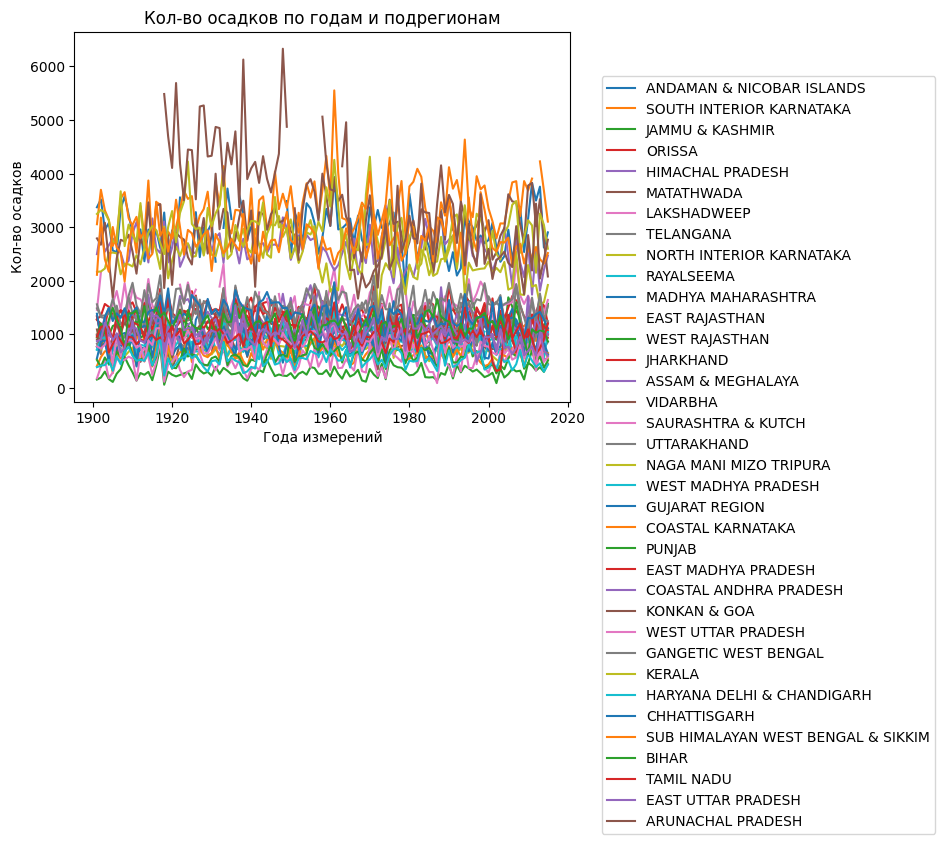

In [180]:
plt.title('Кол-во осадков по годам и подрегионам')
plt.ylabel('Кол-во осадков')
plt.xlabel('Года измерений')
for subdivision in clear_df['SUBDIVISION'].unique():
  plt.plot(df[df['SUBDIVISION'] == subdivision]['YEAR'], df[df['SUBDIVISION'] == subdivision]['ANNUAL'], label=subdivision)

plt.legend(loc='upper right', bbox_to_anchor=(1.75, 0.9))
plt.tight_layout()

Можно сделать выводы, что **1960-ых** наблюдался **пик осадков**. Кол-во осадков вне зависимосит от *глобального потепления*, что наблюдается в последнее время, остаётся неизменным. В Индии можно выделить **две группы регионов**, которые координально отличаются своим *кличеством осадков*.Грань между этими группами из-за *грамотного представления результатов* хорошо заметна.

Постройтем графики количества осадков по месяцам по всем годам **кумулятивно**

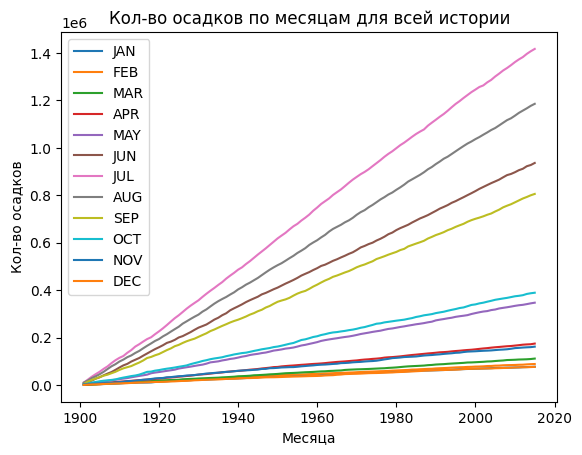

In [203]:
plt.title('Кол-во осадков по месяцам для всей истории')
plt.ylabel('Кол-во осадков')
plt.xlabel('Месяца')
months = ['JAN',	'FEB',	'MAR',	'APR',	'MAY',	'JUN',	'JUL', 'AUG',	'SEP', 'OCT',	'NOV',	'DEC']
for month in months:
  plt.plot(clear_df['YEAR'].unique(), clear_df.groupby('YEAR')[month].sum().cumsum(), label=month)

plt.legend()

Видно *не равномерное распределение осадков* по месяцам. Больше всего осадков за всё время оказалось в **июле**, после идёт **август**, после **июнь**. Меньше всего осадков в **декабре** и **феврале**.

Постройтем графики количества осадков по штатам, используйте boxplot

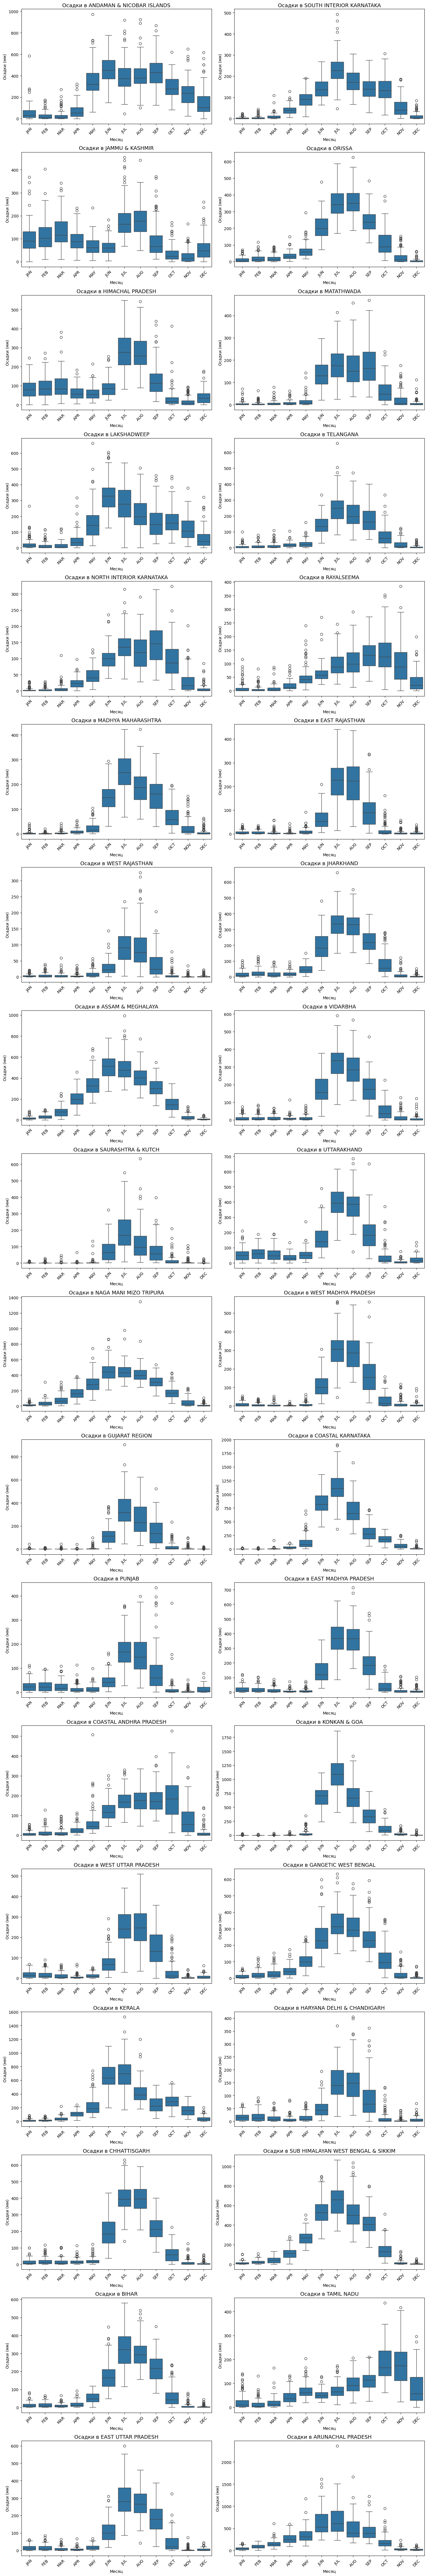

In [247]:
num_states = len(clear_df['SUBDIVISION'].unique())
cols = 2
rows = (num_states + cols - 1) // cols

plt.figure(figsize=(15, 5 * rows))

for i, state in enumerate(clear_df['SUBDIVISION'].unique()):
    plt.subplot(rows, cols, i+1)
    state_data = clear_df[clear_df['SUBDIVISION'] == state]

    melted_data = pd.melt(
        state_data,
        value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
        var_name='Месяц',
        value_name='Осадки'
    )

    sns.boxplot(data=melted_data, x='Месяц', y='Осадки')
    plt.title(f'Осадки в {state}', fontsize=13)
    plt.xticks(rotation=45)
    plt.xlabel('Месяц')
    plt.ylabel('Осадки (мм)')

plt.tight_layout()
plt.show()

В результате для каждого региона можно узнать его самый богатый месяц на осадки

Определим штаты, для которых количество осадков минимально и максимально

In [255]:
groupby_subdivision = clear_df.groupby('SUBDIVISION').sum()['ANNUAL'].sort_values()

Штат с минимальным кол-ом осадков

In [256]:
groupby_subdivision.head(1)

,ANNUAL
SUBDIVISION,
WEST RAJASTHAN,33657.4


Штат с максимальным кол-ом осадков

In [257]:
groupby_subdivision.tail(1)

,ANNUAL
SUBDIVISION,
COASTAL KARNATAKA,388558.7


Выведем уникальные имена штатов и территорий Индии

In [261]:
print(*clear_df['SUBDIVISION'].unique(), sep='\n')

ANDAMAN & NICOBAR ISLANDS
SOUTH INTERIOR KARNATAKA
JAMMU & KASHMIR
ORISSA
HIMACHAL PRADESH
MATATHWADA
LAKSHADWEEP
TELANGANA
NORTH INTERIOR KARNATAKA
RAYALSEEMA
MADHYA MAHARASHTRA
EAST RAJASTHAN
WEST RAJASTHAN
JHARKHAND
ASSAM & MEGHALAYA
VIDARBHA
SAURASHTRA & KUTCH
UTTARAKHAND
NAGA MANI MIZO TRIPURA
WEST MADHYA PRADESH
GUJARAT REGION
COASTAL KARNATAKA
PUNJAB
EAST MADHYA PRADESH
COASTAL ANDHRA PRADESH
KONKAN & GOA
WEST UTTAR PRADESH
GANGETIC WEST BENGAL
KERALA
HARYANA DELHI & CHANDIGARH
CHHATTISGARH
SUB HIMALAYAN WEST BENGAL & SIKKIM
BIHAR
TAMIL NADU
EAST UTTAR PRADESH
ARUNACHAL PRADESH


Определим количество лет наблюдений для каждого штата

In [264]:
count_years_observations = clear_df.groupby('SUBDIVISION').count()['YEAR'].sort_values()
count_years_observations

,YEAR
SUBDIVISION,
ARUNACHAL PRADESH,91
LAKSHADWEEP,103
ANDAMAN & NICOBAR ISLANDS,104
COASTAL KARNATAKA,114
JAMMU & KASHMIR,114
WEST MADHYA PRADESH,114
COASTAL ANDHRA PRADESH,115
BIHAR,115
EAST MADHYA PRADESH,115


Определим  штат с наименьшим количеством наблюдений

In [265]:
count_years_observations.head(1)

,YEAR
SUBDIVISION,
ARUNACHAL PRADESH,91


Добавим в набор данных признак, являющийся суммой двух других признаков: признак JAN + AUG

In [268]:
clear_df['JAN + AUG'] = clear_df['JAN'] + clear_df['AUG']
clear_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,JAN + AUG
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,530.3
3772,SOUTH INTERIOR KARNATAKA,1901,4.9,31.8,3.0,32.7,109.6,106.0,210.0,109.2,140.8,170.1,72.5,12.3,1003.0,36.8,145.4,566.0,254.9,114.1
1702,JAMMU & KASHMIR,1901,66.4,69.3,69.6,132.2,105.8,53.4,171.7,181.3,101.8,24.1,0.0,4.4,979.9,135.6,307.6,508.2,28.5,247.7
667,ORISSA,1901,39.5,65.1,16.1,51.6,79.0,78.2,288.4,307.7,185.3,76.6,96.7,0.0,1284.2,104.6,146.7,859.6,173.3,347.2
1587,HIMACHAL PRADESH,1901,137.8,174.5,75.0,19.2,89.6,32.7,280.5,459.7,53.0,3.9,0.0,19.1,1345.1,312.3,183.8,825.9,23.0,597.5


Вычислим корреляцию Пирсона и Спирмена между признаками NOV и MAR

In [285]:
corr, p_value = scipy.stats.pearsonr(clear_df['NOV'], clear_df['MAR'])
print(f'Коэффициент корреляции Пирсона: {corr:.4f}, p-value: {p_value:.4f}')

Коэффициент корреляции Пирсона: 0.0086, p-value: 0.5820


In [286]:
corr, p_value = scipy.stats.spearmanr(clear_df['NOV'], clear_df['MAR'])
print(f'Коэффициент корреляции Спирмена: {corr:.4f}, p-value: {p_value:.4f}')

Коэффициент корреляции Спирмена: 0.1419, p-value: 0.0000


Получили, что **линейной записимости** между признаками отсутствует, но есть слабая **монотоная зависимость**.

Построем гистограммы для указанных признаков

<BarContainer object of 2 artists>

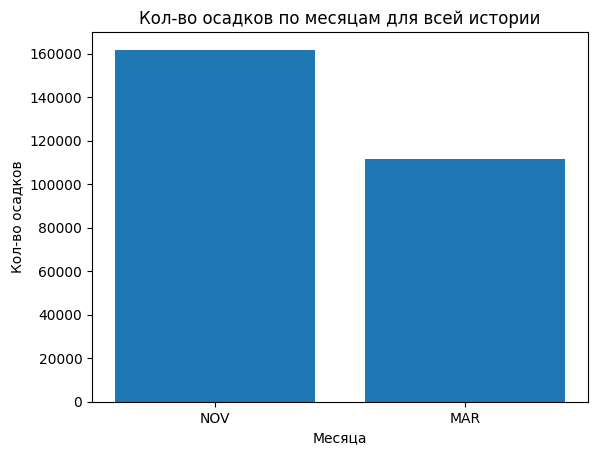

In [275]:
plt.title('Кол-во осадков по месяцам для всей истории')
plt.ylabel('Кол-во осадков')
plt.xlabel('Месяца')
clear_df[['NOV', 'MAR']].corr(method='spearman')
plt.bar(('NOV', 'MAR'), (clear_df['NOV'].sum(), clear_df['MAR'].sum()))

Кол-во осадков в *ноябре* выше, чем в *марте*